In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exercise 1

In [2]:
df = pd.read_csv("cces_sample_coursera.csv")

In [3]:
df

,caseid,region,gender,educ,edloan,race,hispanic,employ,marstat,pid7,ideo5,pew_religimp,newsint,faminc_new,union,investor,CC18_308a,CC18_310a,CC18_310b,CC18_310c,CC18_310d,CC18_325a,CC18_325b,CC18_325c,CC18_325d
0,417614315,3,1,2,2.0,1,2,5,3,6,3,1.0,2,1,3.0,2,2,2.0,3.0,3.0,5.0,1.0,2.0,1.0,1.0
1,415490556,1,2,6,2.0,1,1,1,1,2,2,3.0,3,12,3.0,2,4,3.0,2.0,5.0,5.0,2.0,2.0,2.0,1.0
2,414351505,3,2,3,2.0,2,2,1,4,2,3,1.0,3,4,3.0,1,4,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
3,411855339,1,2,5,2.0,6,2,5,3,3,1,2.0,1,6,2.0,1,4,3.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0
4,417056957,2,1,2,NaN,4,2,8,5,1,1,4.0,2,4,3.0,2,4,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,410945270,2,1,6,2.0,1,2,5,1,3,3,2.0,1,14,3.0,1,4,2.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0
996,414240025,2,2,5,1.0,2,2,1,5,1,2,2.0,3,6,3.0,2,4,2.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0
997,420156780,2,2,5,2.0,1,2,1,5,2,3,3.0,1,6,3.0,1,4,2.0,2.0,3.0,2.0,1.0,2.0,2.0,1.0
998,412382118,2,2,6,NaN,3,2,5,1,5,4,1.0,1,9,3.0,1,1,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        1000 non-null   int64  
 1   region        1000 non-null   int64  
 2   gender        1000 non-null   int64  
 3   educ          1000 non-null   int64  
 4   edloan        895 non-null    float64
 5   race          1000 non-null   int64  
 6   hispanic      1000 non-null   int64  
 7   employ        1000 non-null   int64  
 8   marstat       1000 non-null   int64  
 9   pid7          1000 non-null   int64  
 10  ideo5         1000 non-null   int64  
 11  pew_religimp  999 non-null    float64
 12  newsint       1000 non-null   int64  
 13  faminc_new    1000 non-null   int64  
 14  union         998 non-null    float64
 15  investor      1000 non-null   int64  
 16  CC18_308a     1000 non-null   int64  
 17  CC18_310a     993 non-null    float64
 18  CC18_310b     993 non-null   

In [5]:
df.describe()

,caseid,region,gender,educ,edloan,race,hispanic,employ,marstat,pid7,ideo5,pew_religimp,newsint,faminc_new,union,investor,CC18_308a,CC18_310a,CC18_310b,CC18_310c,CC18_310d,CC18_325a,CC18_325b,CC18_325c,CC18_325d
count,1.000000e+03,1000.00000,1000.00000,1000.00000,895.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,999.000000,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,993.000000,993.000000,993.000000,981.000000,999.000000,999.000000,999.000000,999.000000
mean,4.144883e+08,2.59100,1.54800,3.76100,1.762011,1.457000,1.972000,3.356000,2.743000,3.62400,2.986000,2.304304,1.665000,6.518000,2.623246,1.556000,2.808000,2.611279,2.932528,2.819738,2.883792,1.525526,1.329329,1.494494,1.252252
std,3.138979e+06,1.00734,0.49794,1.53761,0.426090,1.113279,0.165055,2.457499,1.904883,2.24492,1.268627,1.167998,0.880653,3.292494,0.653929,0.497103,1.281709,0.938617,1.006270,1.045696,1.196403,0.499598,0.470205,0.500220,0.434523
min,3.478456e+08,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.127183e+08,2.00000,1.00000,2.00000,2.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,4.141936e+08,3.00000,2.00000,4.00000,2.000000,1.000000,2.000000,2.000000,1.000000,3.00000,3.000000,2.000000,1.000000,6.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000
75%,4.161375e+08,3.00000,2.00000,5.00000,2.000000,1.000000,2.000000,5.000000,5.000000,6.00000,4.000000,3.000000,2.000000,9.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000
max,4.203442e+08,4.00000,2.00000,6.00000,2.000000,8.000000,2.000000,9.000000,6.000000,7.00000,5.000000,4.000000,4.000000,16.000000,3.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.columns

Index(['caseid', 'region', 'gender', 'educ', 'edloan', 'race', 'hispanic', 'employ', 'marstat', 'pid7', 'ideo5', 'pew_religimp', 'newsint', 'faminc_new', 'union', 'investor', 'CC18_308a', 'CC18_310a', 'CC18_310b', 'CC18_310c', 'CC18_310d', 'CC18_325a', 'CC18_325b', 'CC18_325c', 'CC18_325d'], dtype='object')

## Data Visualization

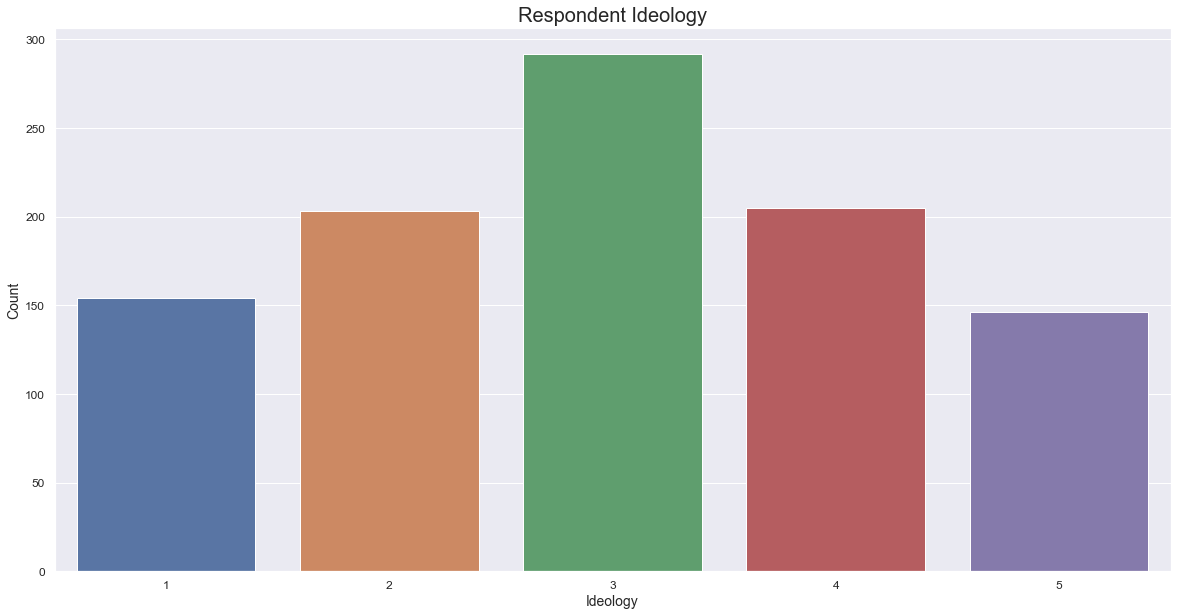

In [7]:
fig = plt.figure(figsize=(20,10))

plt.subplot(111)
plt.title("Respondent Ideology", fontsize=20)
sns.countplot(x="ideo5", data=df)
plt.xlabel("Ideology")
plt.ylabel("Count")

plt.show()

## Exercise 2

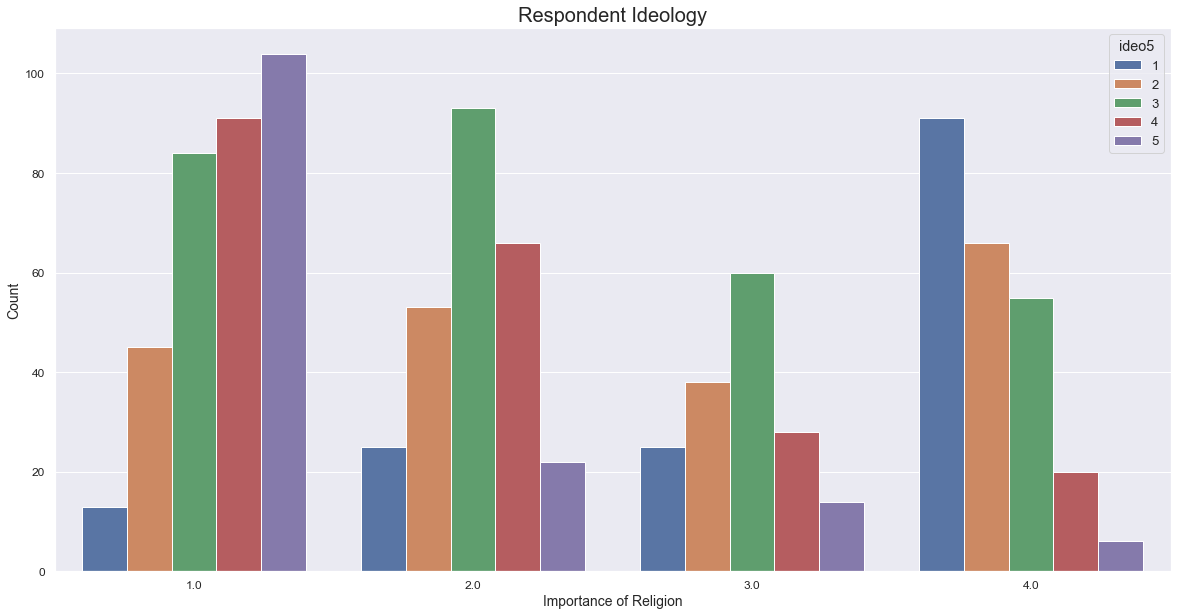

In [8]:
fig = plt.figure(figsize=(20,10))

plt.subplot(111)
plt.title("Respondent Ideology", fontsize=20)
sns.countplot(x="pew_religimp", hue="ideo5", data=df)
plt.xlabel("Importance of Religion")
plt.ylabel("Count")

plt.show()

In [9]:
df.head()

,caseid,region,gender,educ,edloan,race,hispanic,employ,marstat,pid7,ideo5,pew_religimp,newsint,faminc_new,union,investor,CC18_308a,CC18_310a,CC18_310b,CC18_310c,CC18_310d,CC18_325a,CC18_325b,CC18_325c,CC18_325d
0,417614315,3,1,2,2.0,1,2,5,3,6,3,1.0,2,1,3.0,2,2,2.0,3.0,3.0,5.0,1.0,2.0,1.0,1.0
1,415490556,1,2,6,2.0,1,1,1,1,2,2,3.0,3,12,3.0,2,4,3.0,2.0,5.0,5.0,2.0,2.0,2.0,1.0
2,414351505,3,2,3,2.0,2,2,1,4,2,3,1.0,3,4,3.0,1,4,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
3,411855339,1,2,5,2.0,6,2,5,3,3,1,2.0,1,6,2.0,1,4,3.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0
4,417056957,2,1,2,NaN,4,2,8,5,1,1,4.0,2,4,3.0,2,4,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0


In [10]:
df2 = df[["ideo5","pew_religimp"]]

In [11]:
df2

,ideo5,pew_religimp
0,3,1.0
1,2,3.0
2,3,1.0
3,1,2.0
4,1,4.0
...,...,...
995,3,2.0
996,2,2.0
997,3,3.0
998,4,1.0


In [12]:
df2["ideo5"].replace(to_replace=[1,2,3,4,5], value=["Very liberal","Liberal","Moderate","Conservative","Very conservative"], inplace=True)

In [13]:
df2["pew_religimp"].replace(to_replace=[1.0,2.0,3.0,4.0], 
                            value=["Very important","Somewhat important","Not too important","Not at all important"], inplace=True)

In [14]:
df2

,ideo5,pew_religimp
0,Moderate,Very important
1,Liberal,Not too important
2,Moderate,Very important
3,Very liberal,Somewhat important
4,Very liberal,Not at all important
...,...,...
995,Moderate,Somewhat important
996,Liberal,Somewhat important
997,Moderate,Not too important
998,Conservative,Very important


In [15]:
df2.groupby("pew_religimp")["ideo5"].count()

pew_religimp
Not at all important    238
Not too important       165
Somewhat important      259
Very important          337
Name: ideo5, dtype: int64

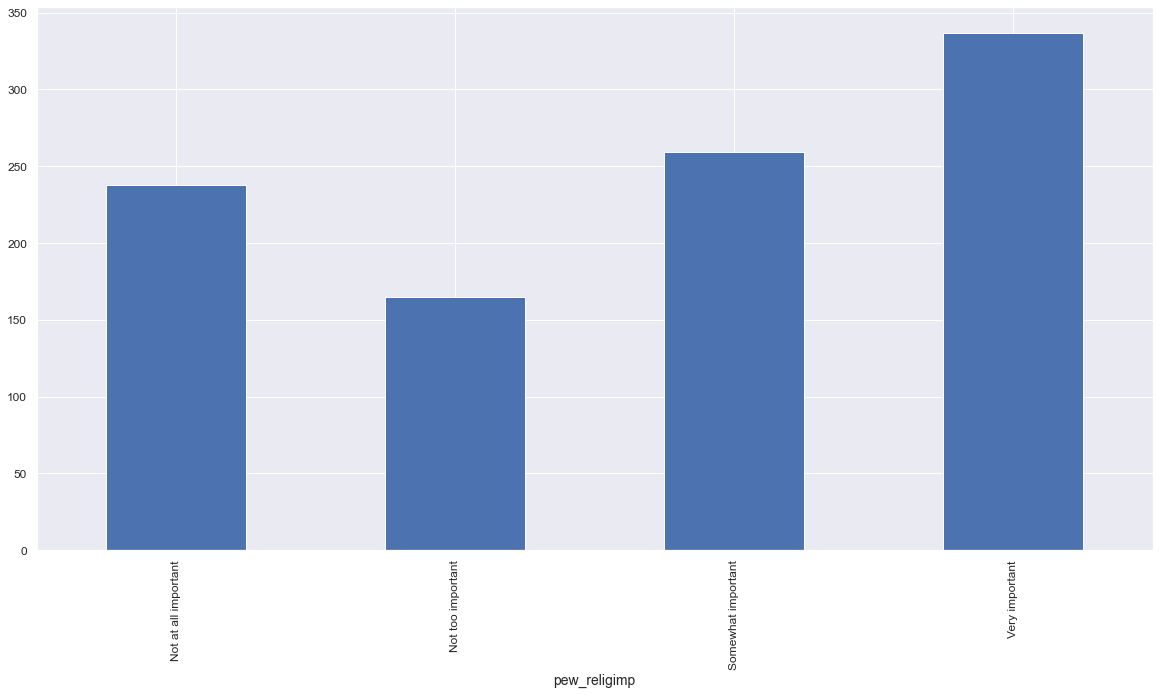

In [16]:
df2.groupby("pew_religimp")["ideo5"].count().plot(kind="bar", stacked=True, figsize=(20,10))
plt.show()

## Exercise 3

In [17]:
columns = ['Semester', 'Student']

In [18]:
df = pd.DataFrame(data={"Semester":[2, 4, 6],
                       "Student":['Amanda', 'Betty', 'Carol']}, columns=columns)

In [19]:
df

,Semester,Student
0,2,Amanda
1,4,Betty
2,6,Carol


In [20]:
import random

In [21]:
df["Grade"] = random.randrange(80,100)

In [22]:
df

,Semester,Student,Grade
0,2,Amanda,98
1,4,Betty,98
2,6,Carol,98
